In [2]:
!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/horse-or-human.zip \
    -O /tmp/horse-or-human.zip

--2021-07-27 20:42:03--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/horse-or-human.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 34.64.4.80, 34.64.4.48, 34.64.4.16, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|34.64.4.80|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 149574867 (143M) [application/zip]
Saving to: ‘/tmp/horse-or-human.zip’

/tmp/horse-or-human 100%[===================>] 142.65M  13.5MB/s    in 9.0s    

2021-07-27 20:42:12 (15.9 MB/s) - ‘/tmp/horse-or-human.zip’ saved [149574867/149574867]



In [21]:
import tensorflow as tf

In [3]:
import os
import zipfile

local_zip = '/tmp/horse-or-human.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp/horse-or-human')
zip_ref.close()

In [6]:
train_horse_dir = os.path.join('/tmp/horse-or-human/horses')
train_human_dir = os.path.join('/tmp/horse-or-human/humans')

In [7]:
train_horse_names = os.listdir(train_horse_dir)
print(train_horse_names[:10])

['horse34-8.png', 'horse19-4.png', 'horse06-7.png', 'horse13-8.png', 'horse07-4.png', 'horse10-9.png', 'horse28-3.png', 'horse04-3.png', 'horse35-4.png', 'horse29-0.png']


In [9]:
train_human_names = os.listdir(train_human_dir)
print(train_human_names[:10])

['human17-10.png', 'human16-25.png', 'human10-10.png', 'human06-28.png', 'human05-04.png', 'human11-13.png', 'human06-10.png', 'human13-17.png', 'human14-07.png', 'human07-25.png']


In [10]:
print('total training horse images: ', len(os.listdir(train_horse_dir)))
print('total training human images: ', len(os.listdir(train_human_dir)))

total training horse images:  500
total training human images:  527


In [12]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [13]:
nrows = 4
ncols = 4

pic_index = 0

In [16]:
fig = plt.gcf()
fig.set_size_inches(nrows*4, ncols*4)

<Figure size 1152x1152 with 0 Axes>

In [17]:
pic_index += 8

next_horse_pix = [
    os.path.join(train_horse_dir, fname)
    for fname in train_horse_names[pic_index-8:pic_index]
]

next_human_pix = [
    os.path.join(train_human_dir, fname)
    for fname in train_human_names[pic_index-8:pic_index]
]

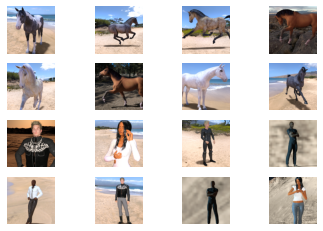

In [19]:
for i, img_path in enumerate(next_horse_pix + next_human_pix):
    sp = plt.subplot(nrows, ncols, i+1)
    sp.axis('Off')
    
    img = mpimg.imread(img_path)
    plt.imshow(img)
    
plt.show()

In [22]:
model = tf.keras.models.Sequential([
    # Convolution 1
    tf.keras.layers.Conv2D(16, (3,3), activation = 'relu', input_shape = (300,300,3)),
    tf.keras.layers.MaxPooling2D(2,2),
    
    # Convolution 2
    tf.keras.layers.Conv2D(32, (3,3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    
    # Convolution 3
    tf.keras.layers.Conv2D(64, (3,3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    
    # Convolution 4
    tf.keras.layers.Conv2D(64, (3,3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    
    # Convolution 5
    tf.keras.layers.Conv2D(64, (3,3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    
    # Flatten
    tf.keras.layers.Flatten(),
    
    # Hidden Layer
    tf.keras.layers.Dense(512, activation = 'relu'),
    
    # Output Neuron
    tf.keras.layers.Dense(1, activation = 'sigmoid')
])

In [23]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 298, 298, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 149, 149, 16)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 147, 147, 32)      4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 73, 73, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 71, 71, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 35, 35, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 33, 33, 64)        3

In [24]:
from tensorflow.keras.optimizers import RMSprop

In [42]:
model.compile(
    loss = 'binary_crossentropy', 
    optimizer = RMSprop(learning_rate = 0.001),
    metrics = ['accuracy']
)

In [43]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [44]:
train_datagen = ImageDataGenerator(rescale = 1/255)

In [45]:
train_generator = train_datagen.flow_from_directory(
    '/tmp/horse-or-human/',
    target_size = (300, 300),
    batch_size = 128,
    class_mode = 'binary'
)

Found 1027 images belonging to 2 classes.


In [46]:
history = model.fit(
    train_generator,
    steps_per_epoch = 8,
    epochs = 15,
    verbose = 1
)

Epoch 1/15
8/8 [==============================] - 18s 2s/step - loss: 1.1202 - accuracy: 0.5306
Epoch 2/15
8/8 [==============================] - 18s 2s/step - loss: 0.6157 - accuracy: 0.6385
Epoch 3/15
8/8 [==============================] - 18s 2s/step - loss: 0.7138 - accuracy: 0.8020
Epoch 4/15
8/8 [==============================] - 18s 2s/step - loss: 0.3792 - accuracy: 0.8432
Epoch 5/15
8/8 [==============================] - 20s 2s/step - loss: 0.2575 - accuracy: 0.9043
Epoch 6/15
8/8 [==============================] - 20s 2s/step - loss: 0.1104 - accuracy: 0.9619
Epoch 7/15
8/8 [==============================] - 18s 3s/step - loss: 0.7477 - accuracy: 0.8710
Epoch 8/15
8/8 [==============================] - 18s 2s/step - loss: 0.4754 - accuracy: 0.9188
Epoch 9/15
8/8 [==============================] - 20s 2s/step - loss: 0.0790 - accuracy: 0.9717
Epoch 10/15
8/8 [==============================] - 18s 2s/step - loss: 0.1117 - accuracy: 0.9555
Epoch 11/15
8/8 [======================

In [47]:
import numpy as np
import random
from tensorflow.keras.preprocessing.image import img_to_array, load_img

In [49]:
successive_outputs = [layer.output for layer in model.layers[1:]]
visualization_model = tf.keras.models.Model(
    inputs = model.input, 
    outputs = successive_outputs
)

In [50]:
horse_img_files = [
    os.path.join(train_horse_dir, f) for f in train_horse_names
]

human_img_files = [
    os.path.join(train_human_dir, f) for f in train_human_names
]

In [51]:
img_path = random.choice(human_img_files + human_img_files)

In [52]:
img = load_img(img_path, target_size = (300,300))

x = img_to_array(img)
x = x.reshape((1, ) + x.shape)

x /= 255

In [53]:
successive_feature_maps = visualization_model.predict(x)

In [54]:
layer_names = [layer.name for layer in model.layers[1:]]

<ipython-input-55-db1778067654>:11: RuntimeWarning: invalid value encountered in true_divide
  x /= x.std()


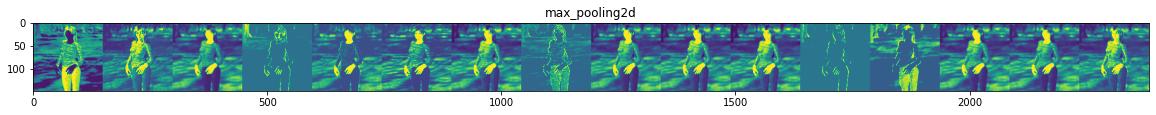

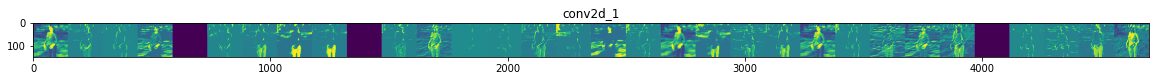

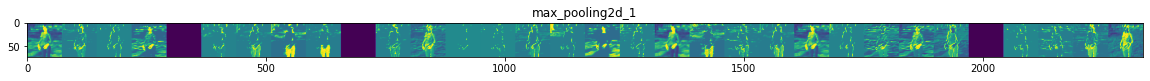

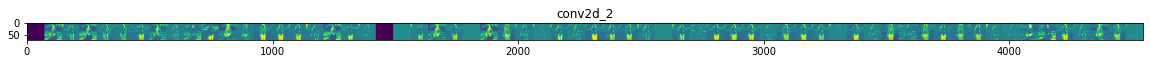

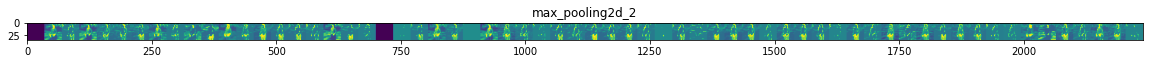

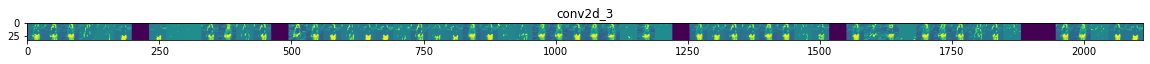

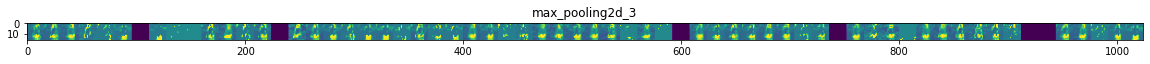

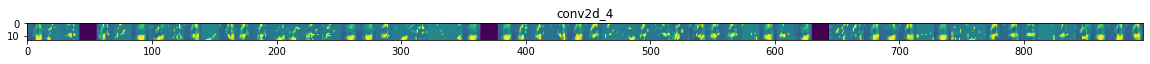

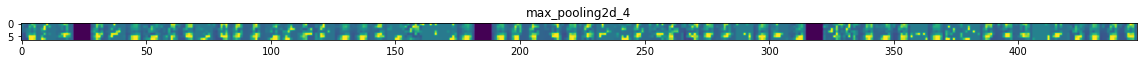

In [55]:
for layer_name, feature_map in zip(layer_names, successive_feature_maps):
    if len(feature_map.shape) == 4:
        n_features = feature_map.shape[-1]
        size = feature_map.shape[1]
        
        display_grid = np.zeros((size, size * n_features))
        
        for i in range(n_features):
            x = feature_map[0, :, :, i]
            x -= x.mean()
            x /= x.std()
            
            x *= 64
            x += 128
            
            x = np.clip(x, 0, 255).astype('uint8')
            display_grid[:, i*size : (i+1)*size] = x
    
        scale = 20. / n_features
        
        plt.figure(figsize = (scale*n_features, scale))
        plt.title(layer_name)
        plt.grid(False)
        plt.imshow(display_grid, aspect='auto', cmap='viridis')